<a href="https://colab.research.google.com/github/kkh9372/Colab/blob/main/ch4.%ED%85%8D%EC%8A%A4%ED%8A%B8%20%EB%B6%84%EC%84%9D/1_%ED%85%8D%EC%8A%A4%ED%8A%B8_%EC%A0%84%EC%B2%98%EB%A6%AC_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
날짜 : 2021/11/23
이름 : 김관후
내용 : 텍스트 분석 전처리 실습하기
"""
!pip install konlpy

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from konlpy.tag import  Okt, Kkma
from wordcloud import WordCloud
import seaborn as sns

In [ ]:
# 형태소 분석


In [ ]:
# 꼬꼬마 형태소 분석기 생성
kkma = Kkma()

text = '나는 보리밥을 먹었다.'
print('명사 :', kkma.nouns(text))
print('형태소 :', kkma.morphs(text))
print('품사 :', kkma.pos(text))

명사 : ['나', '보리밥']
형태소 : ['나', '는', '보리밥', '을', '먹', '었', '다', '.']
품사 : [('나', 'NP'), ('는', 'JX'), ('보리밥', 'NNG'), ('을', 'JKO'), ('먹', 'VV'), ('었', 'EPT'), ('다', 'EFN'), ('.', 'SF')]


In [ ]:
# Okt(Open Korean Text) 텍스트 분석기 생성
okt = Okt()

text = '나는 보리밥을 먹었다.'
print('명사 :', kkma.nouns(text))
print('형태소 :', kkma.morphs(text))
print('품사 :', kkma.pos(text))

명사 : ['나', '보리밥']
형태소 : ['나', '는', '보리밥', '을', '먹', '었', '다', '.']
품사 : [('나', 'NP'), ('는', 'JX'), ('보리밥', 'NNG'), ('을', 'JKO'), ('먹', 'VV'), ('었', 'EPT'), ('다', 'EFN'), ('.', 'SF')]


In [ ]:
# 토큰화 (BoW)

text = ['You are so beatiful',
        'You are so best',
        'I love dog',
        'I drink coffee every morning',
        'I hate you']

tokenizer = Tokenizer()
tokenizer.fit_on_texts(text)
word_dic = tokenizer.word_index
word_dic

{'are': 3,
 'beatiful': 5,
 'best': 6,
 'coffee': 10,
 'dog': 8,
 'drink': 9,
 'every': 11,
 'hate': 13,
 'i': 2,
 'love': 7,
 'morning': 12,
 'so': 4,
 'you': 1}

In [ ]:
# 텍스트 벡터화
sequences = tokenizer.texts_to_sequences(text)
 sequences

[[1, 3, 4, 5], [1, 3, 4, 6], [2, 7, 8], [2, 9, 10, 11, 12], [2, 13, 1]]

In [ ]:
# 패딩처리
padd_sequences = pad_sequences(sequences, padding='post')
padd_sequences

array([[ 1,  3,  4,  5,  0],
       [ 1,  3,  4,  6,  0],
       [ 2,  7,  8,  0,  0],
       [ 2,  9, 10, 11, 12],
       [ 2, 13,  1,  0,  0]], dtype=int32)

In [ ]:
########################################################
# 텍스트 탐색분석
train_data = pd.read_table('/content/drive/MyDrive/Colab Notebooks/file/movie_review_train.txt')
test_data = pd.read_table('/content/drive/MyDrive/Colab Notebooks/file/movie_review_test.txt')
train_data

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [ ]:
# 리부 길이 확인
review_length = train_data['document'].astype(str).apply(len)
review_length

0         19
1         33
2         17
3         29
4         61
          ..
149995    19
149996    13
149997    31
149998    27
149999    19
Name: document, Length: 150000, dtype: int64

Text(0, 0.5, 'Count')

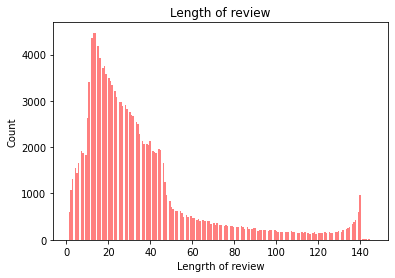

In [ ]:
plt.hist(review_length, bins=200, alpha=0.5, color='r', label='word')
plt.title('Length of review')
plt.xlabel('Lengrth of review')
plt.ylabel('Count')

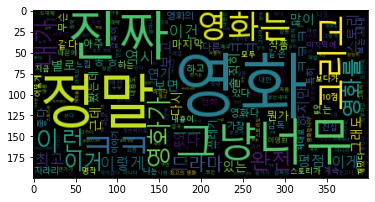

In [ ]:
# 어휘 빈도 확인
train_review = [review for review in train_data['document'] if type(review) is str]
train_review

wc= WordCloud(
    font_path='/content/drive/MyDrive/Colab Notebooks/file/malgun.ttf'
).generate(' '.join(train_review))
plt.imshow(wc, interpolation='bilinear')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


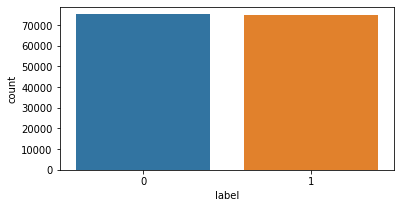

In [ ]:
# 긍정, 부정 비율 확인
flg, axe = plt.subplots(ncols=1)
flg.set_size_inches(6,3)
sns.countplot(train_data['label'])